<a href="https://colab.research.google.com/github/kirito9623/analisis-de-datos/blob/main/reporte-acciones-apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPORTE ACCIONES APPLE
Usando los últimos dos años de la serie de valores de las acciones de Apple Inc. construir:
1. Un **df** con la información extraída de Yahoo Finance
2. Guardar el df en un archivo .csv en disco
3. De la variable 'Close' calcular las estadísticas
4. De la variable 'Close' hacer una tabla de frecuencias
5. De la variable 'Close' hacer un histograma
6. De las variables 'Open' y 'Close' desplegar simultáneamente las series temporales

ALUMNO: ROBERTO GONZALEZ CARRANZA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Extrayendo información de Yahoo Finance

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Descargar datos de las acciones de Apple Inc. para los últimos dos años
apple_data = yf.download('AAPL', period='2y')

[*********************100%%**********************]  1 of 1 completed


# Guardando el df en un archivo .csv

In [ ]:
apple_data.to_csv('/content/drive/MyDrive/apple_data.csv',
        index=False,)

In [ ]:
# Mostrar el DataFrame
print("Primeras filas del DataFrame:")
print(apple_data.head())

Primeras filas del DataFrame:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-08-01  161.009995  163.589996  160.889999  161.509995  159.703171   
2022-08-02  160.100006  162.410004  159.630005  160.009995  158.219940   
2022-08-03  160.839996  166.589996  160.750000  166.130005  164.271484   
2022-08-04  166.009995  167.190002  164.429993  165.809998  163.955078   
2022-08-05  163.210007  165.850006  163.000000  165.350006  163.727341   

              Volume  
Date                  
2022-08-01  67829400  
2022-08-02  59907000  
2022-08-03  82507500  
2022-08-04  55474100  
2022-08-05  56697000  


#  Calculando las Estadísticas de la Variable 'Close'

In [ ]:
print('Medidas de tendencia Central')
print(apple_data.Close.mean()) # Media
print(apple_data.Close.mode()) # Moda
print(apple_data.Close.median()) # Mediana
print('\nCuantiles')
print(apple_data.Close.quantile(0.25)) # Percentil25
print(apple_data.Close.quantile(0.5)) # Percentil50
print(apple_data.Close.quantile(0.75)) # Percentil75
print('\nMedidas de Dispersion')
print(apple_data.Close.var()) # Varianza
print(apple_data.Close.max() - apple_data.Close.min()) # Rango

Medidas de tendencia Central
172.81155372710816
0     138.380005
1     145.429993
2     163.759995
3     169.300003
4     170.029999
5     172.070007
6     172.690002
7     173.000000
8     173.029999
9     173.500000
10    173.750000
11    175.839996
12    176.080002
13    177.970001
14    178.850006
15    179.800003
16    194.500000
Name: Close, dtype: float64
173.61500549316406

Cuantiles
155.07749938964844
173.61500549316406
187.67249298095703

Medidas de Dispersion
473.5312452205973
109.80001068115234


# Tabla de Frecuencias de la variable "Close"

In [ ]:
# Crear una tabla de frecuencias para la variable 'Close'
def tabla_frec(series, bins=10, clases=True):
    if clases:
        freqs = pd.cut(series, bins=bins).value_counts().sort_index()
    else:
        freqs = series.value_counts().sort_index()

    freqs_df = freqs.reset_index()
    freqs_df.columns = ['Clase' if clases else 'Valor', 'Frecuencia']

    return len(freqs_df), freqs_df

# Crear la tabla de frecuencias para la variable 'Close'
n_clases_close, tab_close = tabla_frec(apple_data['Close'])

# Mostrar la tabla de frecuencias
print("\nTabla de frecuencias de 'Close':")
print(tab_close.to_latex(index=False))  # Escribir como una tabla LaTeX

# Mostrar la tabla
display(tab_close)


Tabla de frecuencias de 'Close':
\begin{tabular}{lr}
\toprule
Clase & Frecuencia \\
\midrule
(124.91, 136.0] & 23 \\
(136.0, 146.98] & 46 \\
(146.98, 157.96] & 69 \\
(157.96, 168.94] & 55 \\
(168.94, 179.92] & 120 \\
(179.92, 190.9] & 99 \\
(190.9, 201.88] & 56 \\
(201.88, 212.86] & 7 \\
(212.86, 223.84] & 14 \\
(223.84, 234.82] & 13 \\
\bottomrule
\end{tabular}



,Clase,Frecuencia
0,"(124.91, 136.0]",23
1,"(136.0, 146.98]",46
2,"(146.98, 157.96]",69
3,"(157.96, 168.94]",55
4,"(168.94, 179.92]",120
5,"(179.92, 190.9]",99
6,"(190.9, 201.88]",56
7,"(201.88, 212.86]",7
8,"(212.86, 223.84]",14
9,"(223.84, 234.82]",13


# Histrograma de variable "Close"

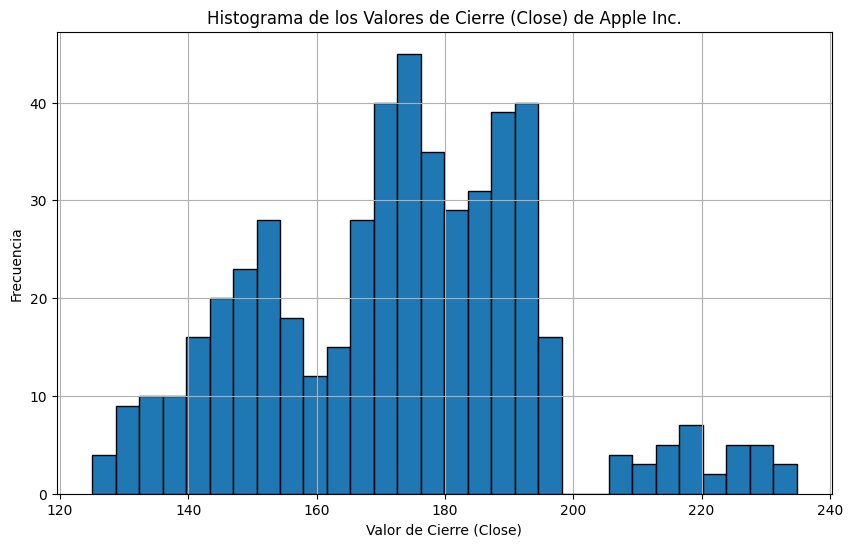

In [ ]:
# Crear un histograma de la variable 'Close'
plt.figure(figsize=(10, 6))
plt.hist(apple_data['Close'], bins=30, edgecolor='k')
plt.title('Histograma de los Valores de Cierre (Close) de Apple Inc.')
plt.xlabel('Valor de Cierre (Close)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfico de Series temporales OPEN y CLOSE

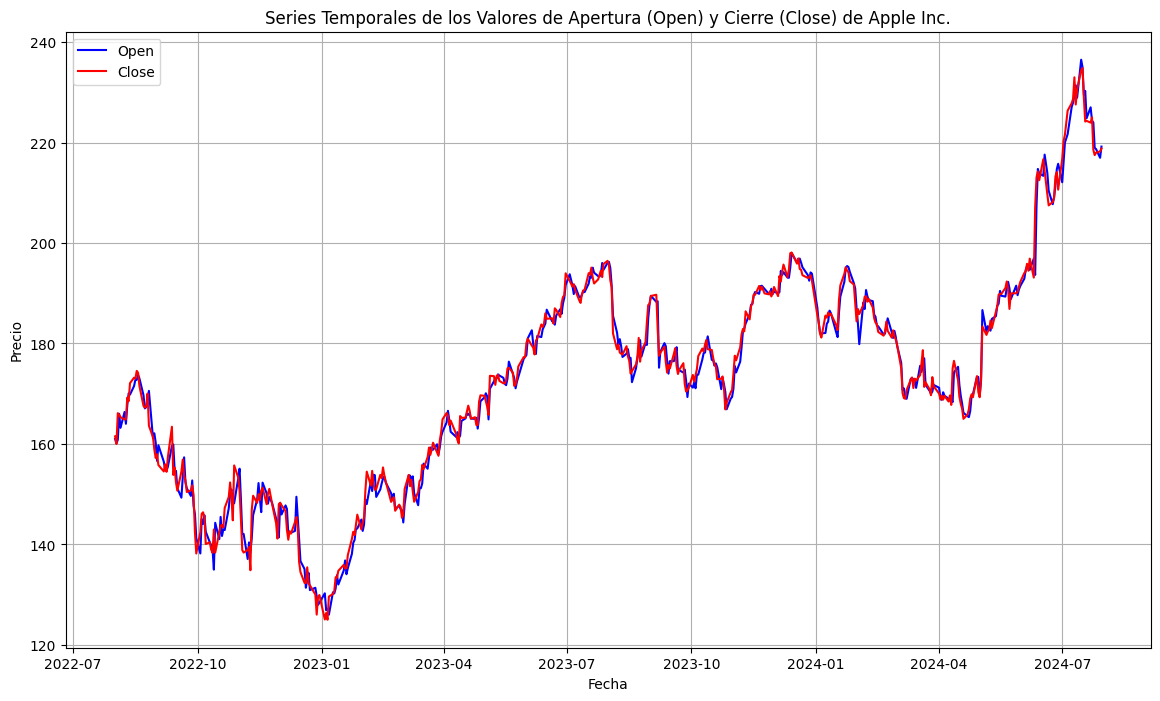

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(apple_data['Open'], label='Open', color='blue')
plt.plot(apple_data['Close'], label='Close', color='red')
plt.title('Series Temporales de los Valores de Apertura (Open) y Cierre (Close) de Apple Inc.')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()